### Project : - Face Mask Detection using Computer vision (opencv) and Deep Learning

Face detection has become a very interesting problem in image processing and computer vision. In this Project, we are going to build computer vision project on Face Mask Detection with Convolution Neural Network

Face mask detection has a range of applications from capturing the movement of the face to facial recognition which at first requires the face to be detected with very good precision. Face detection is more relevant today as it is not only used on images, but also in video applications like real-time surveillance and face detection in videos.

Step 1: Extract face data for training.

Step 2: Train the classifier to classify faces in mask or labels without a mask.

Step 3: Detect faces while testing data .

Step 4: Using the trained classifier, classify the detected faces.

Step 5: Access personal webcam for predictions

import libraries

In [1]:
import cv2
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [6]:
data_path = 'dataset'
categories = os.listdir(data_path)

In [7]:
labels = [i for i in range(len(categories))]
label_dict = dict(zip(categories, labels)) 

In [8]:
print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [9]:
categories

['without_mask', 'with_mask']

In [10]:

img_size=100
data=[]
target=[]

for category in categories:
    folder_path = os.path.join(data_path,category)
#     print(folder_path)
    img_names= os.listdir(folder_path)
#     print(img_names)
    for img_name in img_names:
        img_path= os.path.join(folder_path, img_name)
        img= cv2.imread(img_path)
        
        try:
#             gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized= cv2.resize(img, (img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])
        
        except Exception as e:
            print('Exception:', e)
        

Exception: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

Exception: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

Exception: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

Exception: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

Exception: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function

In [12]:
len(data)

1009

In [13]:
len(target)

1009

#### scaling 

In [14]:
import numpy as np
img_size=100

data= np.array(data)/255.0
# data = np.reshape(data, (data.shape[0], img_size, img_size,1))
target = np.array(target)

In [15]:

from keras.utils import np_utils
target = np.array(target)
new_target = np_utils.to_categorical(target)

In [16]:
new_target[:3]

array([[1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [17]:
data.shape[1:]

(100, 100, 3)

In [18]:
new_target.shape

(1009, 2)

#### Spliting data into Training set and testing set

In [25]:
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.1)

In [26]:
train_data.shape,test_data.shape, train_target.shape

((908, 100, 100, 3), (101, 100, 100, 3), (908, 2))

#### Building a Convoluation NN Model

In [29]:
num_classes = 2

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
  layers.Flatten(),

    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    
  layers.Dense(num_classes, activation= 'sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
# model.fit(X_train_scaled, y_train, epochs=35)              

In [30]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
23/23 [==============================] - 16s 489ms/step - loss: 0.6692 - accuracy: 0.5872 - val_loss: 0.5289 - val_accuracy: 0.6868
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/20
23/23 [==============================] - 7s 323ms/step - loss: 0.4636 - accuracy: 0.7876 - val_loss: 0.3291 - val_accuracy: 0.8626
INFO:tensorflow:Assets written to: model-002.model\assets
Epoch 3/20
23/23 [==============================] - 7s 297ms/step - loss: 0.3334 - accuracy: 0.8714 - val_loss: 0.2914 - val_accuracy: 0.8846
INFO:tensorflow:Assets written to: model-003.model\assets
Epoch 4/20
23/23 [==============================] - 7s 311ms/step - loss: 0.2498 - accuracy: 0.8818 - val_loss: 0.2303 - val_accuracy: 0.9121
INFO:tensorflow:Assets written to: model-004.model\assets
Epoch 5/20
23/23 [==============================] - 7s 308ms/step - loss: 0.1576 - accuracy: 0.9403 - val_loss: 0.2241 - val_accuracy: 0.9451
INFO:tensorflow:Assets written to: model-005.model\assets

#### Model Eavaluation

In [33]:
print(model.evaluate(test_data, test_target))

4/4 [==============================] - 0s 78ms/step - loss: 0.5870 - accuracy: 0.9109
[0.587027370929718, 0.9108911156654358]


#### Predictions 

In [41]:
targets=['without_mask', 'with_Mask']

In [37]:
predictions=model.predict(test_data)[0]

In [42]:
inx=np.argmax(predictions)

In [43]:
targets[inx]

'without_mask'

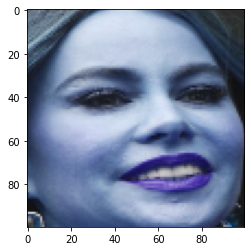

In [44]:
plt.imshow(test_data[0])

In [45]:
# model Saving

In [2]:
from keras.models import load_model
# model1 = load_model('model-005.model')

In [3]:
model1 = load_model('mask_detector (1).model')

#### Predictions on saved Modol

In [182]:
targets[np.argmax(model1.predict(test_data)[0])]

NameError: name 'targets' is not defined

now we are going try predictions on webcam

we are going to use cvlib for face dection  and it returns  face coordinates and face confidence 

In [4]:
import cvlib as cv
import cv2

In [39]:
classes = ['Mask','No Mask']


webcam = cv2.VideoCapture(0)

while webcam.isOpened():
    
    
    status, frame = webcam.read()
    
    
    #apply face detection   
    face, confidence = cv.detect_face(frame)
    
#    print(face, confidence)


    for idx, f in enumerate(face):
        #get corner points of face rectangle
        (startX, startY) = f[0], f[1]
        (endX, endY) = f[2], f[3]
        
        #draw rectange over face
        cv2.rectangle(frame, (startX,startY), (endX,endY), (0,255,0), 2)
        
        
        #crop the detected face region
        face_crop = np.copy(frame[startY:endY, startX:endX])
        
        if (face_crop.shape[0]) < 10 or (face_crop.shape[1]) < 10:
            continue
     
    
        #Preprocessing for gender detection model
        face_crop= cv2.resize(face_crop, (224,224))
        face_crop =np.array(face_crop)
        face_crop = face_crop/255.0
        face_crop = np.expand_dims(face_crop, axis = 0)
        
        
        #apply for detection on face
        conf = model1.predict(face_crop)[0]
        
        
        #get label with max accuracy
        idx = np.argmax(conf)
        label= classes[idx]
        
        label =label = '{}: {:.2f}%'.format(label, conf[idx] * 100) 
        Y = startY - 10 if startY -10 > 10 else startY +10
        
        
        #write label and confidence above face rectangle
        cv2.putText(frame, label , (startX, Y), cv2.FONT_HERSHEY_SIMPLEX,
                   0.7, (0, 255, 0), 2)    
            
        
    cv2.imshow('Face Mask Detection', frame)
        
    

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
    
webcam.release()
cv2.destroyAllWindows()        

#Webcam predictions

In [78]:
pred='./dataset/new_images/tushar_nomask3.jpeg'

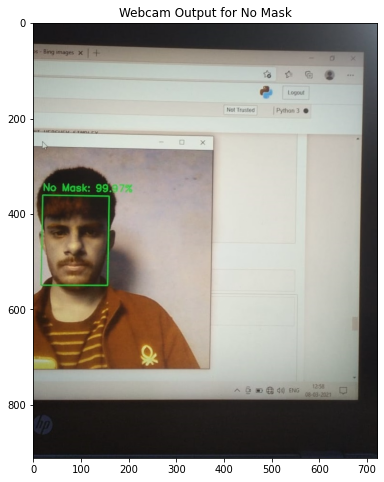

In [79]:
pred = cv2.imread(pred)
plt.figure(figsize=(10,8))
plt.title('Webcam Output for No Mask')
plt.imshow(pred)

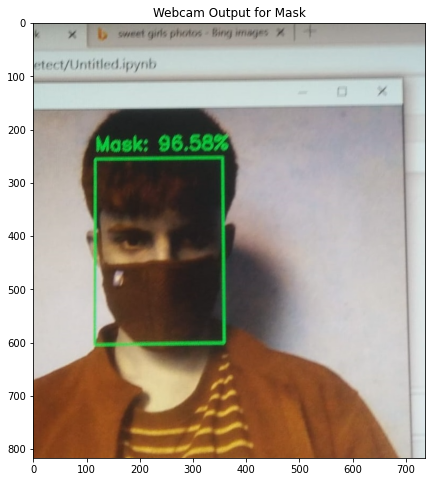

In [136]:
pred='./dataset/new_images/tushar_mask4.jpeg'
pred = cv2.imread(pred)
plt.figure(figsize=(10,8))
plt.title('Webcam Output for Mask')
plt.imshow(pred)


Now we applying this model on our images and we will see predictions

In [108]:
classes = ['Mask','No Mask']

In [109]:
#img path 
path='./dataset/with_mask/with_mask264.jpg'

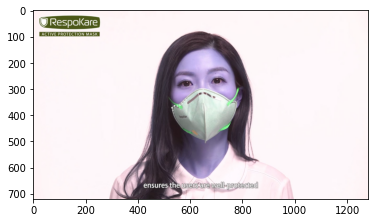

In [110]:
#img ploting
img=cv2.imread(path)
plt.imshow(img)

first apply it for face detection and draw rectangle oover face area

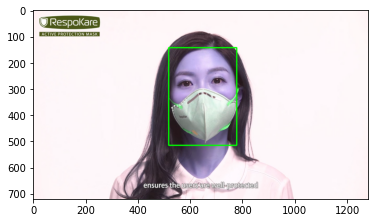

In [111]:
face, confidence = cv.detect_face(img)

for idx, f in enumerate(face):
    (startX, startY) = f[0],f[1]
    (endX, endY) = f[2], f[3]
    
    cv2.rectangle(img, (startX, startY), (endX,endY), (0,255,0), 4)
    plt.imshow(img)

now crop face area and apply it to our model for predictions

In [112]:
face_crop = np.copy(img[startY:endY, startX:endX])

    #Image Preprocessing..
face_crop= cv2.resize(face_crop, (224,224))
face_crop =np.array(face_crop)
face_crop = face_crop/255.0
face_crop = np.expand_dims(face_crop, axis = 0)

In [113]:
conf = model1.predict(face_crop)[0]
dx = np.argmax(conf)
label= classes[idx]
print(label)

Mask


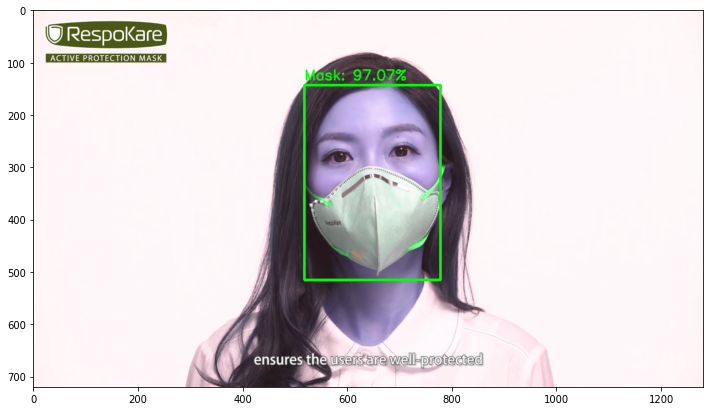

In [114]:
label = '{}: {:.2f}%'.format(label, conf[idx] * 100)
Y = startY - 10 if startY -10 > 10 else startY +10
 #write label and confidence above face rectangle
cv2.putText(img, label , (startX, Y), cv2.FONT_HERSHEY_SIMPLEX,
                   0.9, (0, 255, 0), 2)
plt.figure(figsize=(12,8))
plt.imshow(img)

Lets try to another new images

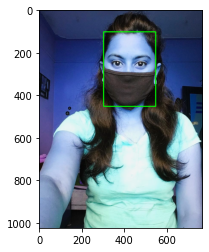

In [133]:
#img path 
path='./dataset/new_images/nikki_mask2.jpeg'
#img ploting
img=cv2.imread(path)
face, confidence = cv.detect_face(img)

for idx, f in enumerate(face):
    (startX, startY) = f[0],f[1]
    (endX, endY) = f[2], f[3]
    
    cv2.rectangle(img, (startX, startY), (endX,endY), (0,255,0), 4)
    plt.imshow(img)

In [134]:
face_crop = np.copy(img[startY:endY, startX:endX])

    #Image Preprocessing..
face_crop= cv2.resize(face_crop, (224,224))
face_crop =np.array(face_crop)
face_crop = face_crop/255.0
face_crop = np.expand_dims(face_crop, axis = 0)
conf = model1.predict(face_crop)[0]
dx = np.argmax(conf)
label= classes[idx]
# print(label)

Text(0.5, 1.0, 'Face Mask Detection')

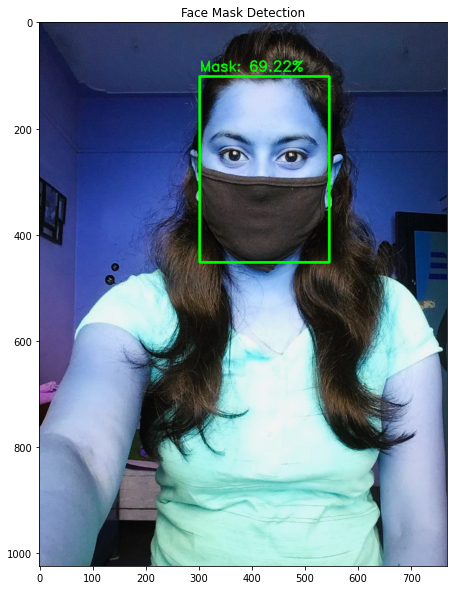

In [135]:
label = '{}: {:.2f}%'.format(label, conf[idx] * 100)
Y = startY - 10 if startY -10 > 10 else startY +10
 #write label and confidence above face rectangle
cv2.putText(img, label , (startX, Y), cv2.FONT_HERSHEY_SIMPLEX,
                   0.9, (0, 255, 0), 2)
plt.figure(figsize=(14,10))
plt.imshow(img)
plt.title("Face Mask Detection")

## Thank You!!!